(     min         AU
 0  0.000  356.55113
 1  0.005  352.90047
 2  0.010  344.53384
 3  0.015  332.94599
 4  0.020  319.63170,
 Text(0.5, 1.0, 'Scatter plot of the data'),
 Text(0.5, 0, 'X'),
 Text(0, 0.5, 'Y'))

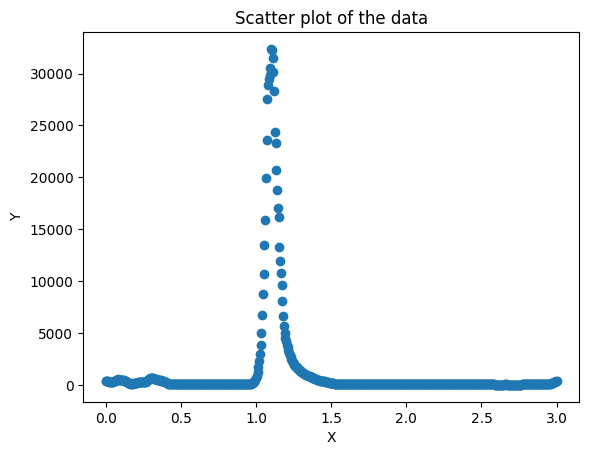

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file
data = pd.read_excel('datos_cromatografia.xlsx', sheet_name=0)

# Display the first few rows of the dataframe
data.head(), plt.scatter(data.iloc[:, 0], data.iloc[:, 1]), plt.title('Scatter plot of the data'), plt.xlabel('X'), plt.ylabel('Y')


(0.00014687942166347057, 0.00026018303469754755)

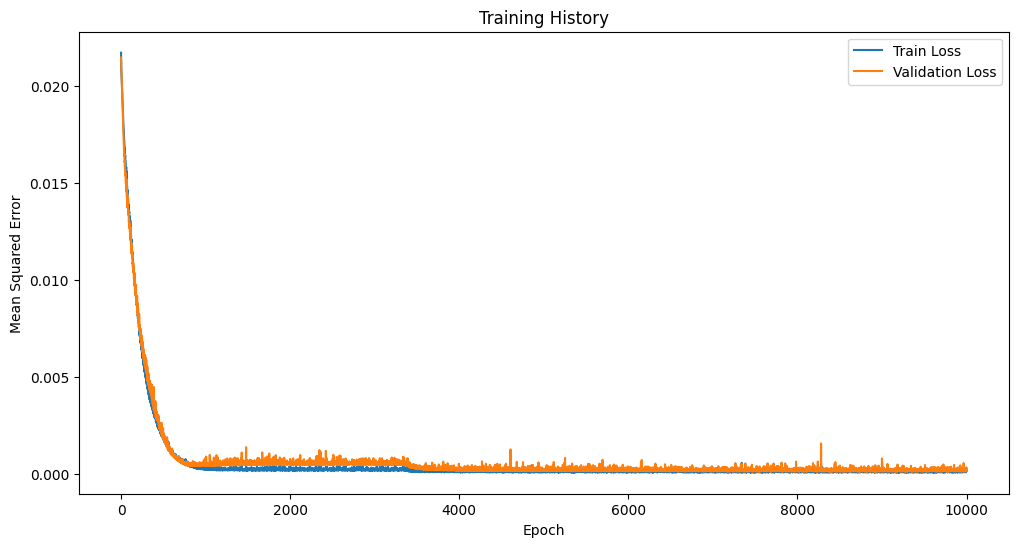

In [7]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Extract input and output from the data
X = data['min'].values.reshape(-1, 1)
y = data['AU'].values.reshape(-1, 1)

# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=0)

# Define a neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_dim=1, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10000, validation_data=(X_test, y_test), verbose=0)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training History')
plt.legend()

train_loss, test_loss


19/19 [==============================] - 0s 365us/step


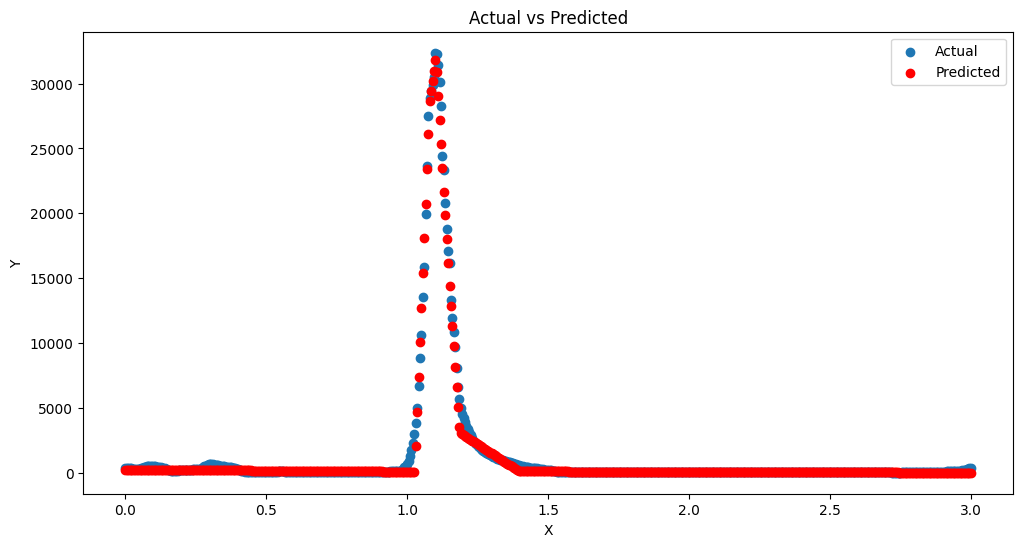

In [8]:
# Assuming X is your input data
X_scaled = scaler_X.transform(X)  # Scaling X
predictions_scaled = model.predict(X_scaled)  # Making predictions
predictions = scaler_y.inverse_transform(predictions_scaled)  # Inverse scaling predictions

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label='Actual')
plt.scatter(X, predictions, label='Predicted', color='r')
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [12]:
@tf.function
def model_func(input_data):
    return model(input_data)

# Use tf.GradientTape to calculate the derivative
with tf.GradientTape() as tape:
    input_data = tf.convert_to_tensor(X_scaled, dtype=tf.float32)  # Ensure the input is a tf.Tensor
    tape.watch(input_data)  # Ensure gradients are tracked
    output_data = model_func(input_data)
    
# Calculate the gradient
gradients = tape.gradient(output_data, input_data)

In [13]:
gradients

<tf.Tensor: shape=(601, 1), dtype=float32, numpy=
array([[ 0.0000000e+00],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [-1.5301671e-02],
       [-1.5301671e-02],
       [-1.5301671e-02],
       [-1.5301671e-02],
       [-1.5301671e-02],
       [-1.5301671e-02],
       [-1.5301671e-02],
       [-1.5301671e-02],
       [-1.5301671e-02],
       [-1.5301671e-02],
       [-1.5301671e-02],
       [-1.5301671e-02],
       [-1.5301671e-02],
       [-1.5301671e-02],
       [-1.5301671e-02],
       [-1.5301671e-02],
       [-1.5301671e-02],
       [-1.5301671e-02],
       [-1.5301671e-02],
       [-1.5301671e-02],
       [-1.5301671e-02],
       [-1.5301671e-02],
       [-1.5301671e-02],
       [-1.5301671e-02],
       [-1.5301671e-02],
       [-1.5301671e-02],
       [-1.5301671e-02],
       [-1.5301671e-02],
       [-1.5301671e-02],
       [-1.5301671e-02],
       [-1.5301671e-02],
       [-1.5301671e-02],
